# Анализ метрик моделей на датасете VK

## 1. Подготовка данных


In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

with open('/content/result_metrics_vk_cup.txt', 'r') as f:
    all_lines = f.readlines()

all_lines[:5]

['ALS\n',
 '\n',
 '=========RESULTS=========\n',
 'MAP@1: 1.07117e-07\n',
 'MAP@10: 2.3688e-06\n']

In [2]:
len(all_lines)

1094

In [11]:
metrics_dict_1 = {}
metrics_dict_2 = {}
last_method_name = ''
for i in range(len(all_lines)):
    cur_line = all_lines[i].replace('\n', '')
    if len(cur_line) == 0 or '=' in cur_line:
        continue
    if ':' not in cur_line:
        last_method_name = cur_line
        continue
    name_metric, value_metric = cur_line.split(':')
    value_metric = float(value_metric)
    if metrics_dict_1.get(last_method_name, None) is None:
        metrics_dict_1[last_method_name] = {}
    if metrics_dict_1[last_method_name].get(name_metric, None) is None:
        metrics_dict_1[last_method_name][name_metric] = value_metric
    else:
        if metrics_dict_2.get(last_method_name, None) is None:
            metrics_dict_2[last_method_name] = {}
        metrics_dict_2[last_method_name][name_metric] = value_metric


In [12]:
metrics_dict_1.keys()

dict_keys(['ALS', 'ImplicitALS', 'SLIM', 'SVD++', 'NGCF + SLIM', 'NGCF', 'NGCF + ALS', 'NGCF + SVD++', 'NGCF + implicit ALS', 'PageRank', 'DSSM', 'RecVAE'])

In [13]:
metrics_dict_2.keys()

dict_keys(['ALS', 'ImplicitALS', 'SLIM', 'SVD++', 'NGCF + SLIM', 'NGCF', 'NGCF + ALS', 'NGCF + SVD++', 'NGCF + implicit ALS', 'PageRank', 'DSSM', 'RecVAE'])

In [14]:
df_1 = pd.DataFrame(metrics_dict_1)
df_1

,ALS,ImplicitALS,SLIM,SVD++,NGCF + SLIM,NGCF,NGCF + ALS,NGCF + SVD++,NGCF + implicit ALS,PageRank,DSSM,RecVAE
MAP@1,1.071170e-07,4.660510e-07,0.000001,7.613510e-07,7.573550e-07,3.367520e-07,5.680160e-07,1.068060e-07,7.063790e-07,5.680160e-07,5.790890e-08,1.420040e-07
MAP@10,2.368800e-06,3.729540e-06,0.000004,3.487150e-06,3.236810e-06,3.088300e-06,2.505980e-06,1.776230e-06,2.259720e-06,3.041530e-06,1.531980e-06,2.529560e-06
MAP@11,2.537880e-06,3.931650e-06,0.000005,3.685180e-06,3.486370e-06,3.334200e-06,2.682260e-06,1.883710e-06,2.507110e-06,3.325180e-06,1.920210e-06,2.761650e-06
MAP@12,2.814860e-06,4.189670e-06,0.000005,3.932250e-06,3.643850e-06,3.598160e-06,2.743590e-06,2.128130e-06,2.558340e-06,3.652560e-06,2.113040e-06,2.853040e-06
MAP@13,2.902870e-06,4.434450e-06,0.000005,4.207020e-06,3.802390e-06,3.849170e-06,2.826970e-06,2.230560e-06,2.689420e-06,3.833810e-06,2.257210e-06,2.970680e-06
MAP@14,3.083730e-06,4.607200e-06,0.000005,4.507140e-06,4.196630e-06,4.137560e-06,2.983880e-06,2.470890e-06,2.852280e-06,4.166500e-06,2.559250e-06,3.258890e-06
MAP@15,3.173430e-06,4.825400e-06,0.000006,4.730390e-06,4.561380e-06,4.400810e-06,3.279410e-06,2.569470e-06,2.993630e-06,4.360090e-06,2.698660e-06,3.386040e-06
MAP@16,3.318390e-06,5.024040e-06,0.000006,5.010360e-06,4.972430e-06,4.611550e-06,3.494260e-06,2.752320e-06,3.148610e-06,4.551130e-06,2.992830e-06,3.604930e-06
MAP@17,3.570590e-06,5.262620e-06,0.000006,5.284260e-06,5.375750e-06,4.749960e-06,3.610740e-06,2.961690e-06,3.280860e-06,4.751910e-06,3.131650e-06,3.738400e-06
MAP@18,3.705610e-06,5.460820e-06,0.000006,5.493740e-06,5.790710e-06,4.950830e-06,3.870990e-06,3.139550e-06,3.409260e-06,4.961200e-06,3.346920e-06,3.886600e-06


In [15]:
df_2 = pd.DataFrame(metrics_dict_2)
df_2

,ALS,ImplicitALS,SLIM,SVD++,NGCF + SLIM,NGCF,NGCF + ALS,NGCF + SVD++,NGCF + implicit ALS,PageRank,DSSM,RecVAE
MAP@1,0.000002,0.000001,0.000001,0.000002,0.000001,0.000001,0.000001,0.000001,0.000001,1.196260e-07,0.000001,0.000007
MAP@10,0.000003,0.000002,0.000002,0.000003,0.000015,0.000002,0.000002,0.000002,0.000022,2.278810e-06,0.000003,0.000018
MAP@11,0.000003,0.000002,0.000002,0.000003,0.000015,0.000002,0.000002,0.000002,0.000022,2.278810e-06,0.000003,0.000018
MAP@12,0.000003,0.000002,0.000002,0.000003,0.000015,0.000002,0.000002,0.000002,0.000022,2.278810e-06,0.000003,0.000018
MAP@13,0.000003,0.000002,0.000002,0.000003,0.000015,0.000002,0.000002,0.000002,0.000022,2.278810e-06,0.000003,0.000018
MAP@14,0.000003,0.000002,0.000002,0.000003,0.000015,0.000002,0.000002,0.000002,0.000022,2.278810e-06,0.000003,0.000018
MAP@15,0.000003,0.000002,0.000002,0.000003,0.000015,0.000002,0.000002,0.000002,0.000022,2.278810e-06,0.000003,0.000018
MAP@16,0.000003,0.000002,0.000002,0.000003,0.000015,0.000002,0.000002,0.000002,0.000022,2.278810e-06,0.000003,0.000018
MAP@17,0.000003,0.000002,0.000002,0.000003,0.000015,0.000002,0.000002,0.000002,0.000022,2.278810e-06,0.000003,0.000018
MAP@18,0.000003,0.000002,0.000002,0.000003,0.000015,0.000002,0.000002,0.000002,0.000022,2.278810e-06,0.000003,0.000018


## 2. Сравнение метрик подхода X и NGCF + X

In [16]:
methods = 'ALS ImplicitALS SLIM	SVD++'.split()


In [17]:
method2ngcf_method = {
    'ALS' : 'NGCF + ALS',
    'ImplicitALS' : 'NGCF + implicit ALS', 
    'SLIM' : 'NGCF + SLIM',
    'SVD++' : 'NGCF + SVD++'
}

### Inference 1

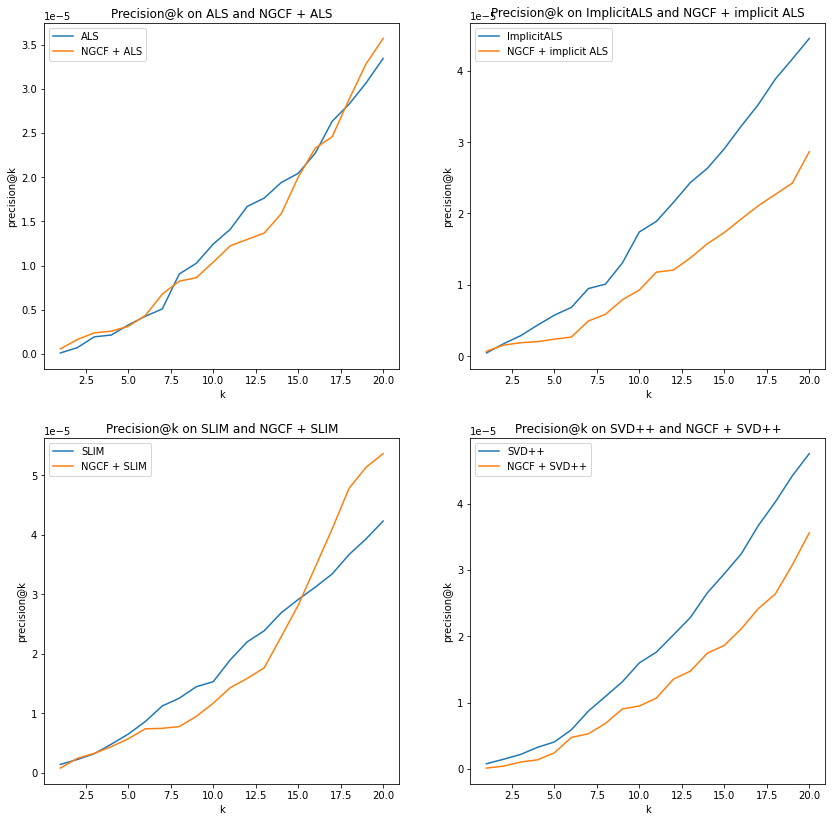

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for ind_method, method in enumerate(methods):
    ngcf_method = method2ngcf_method[method]
    
    precision_method = [0 for _ in range(20)]
    precision_ngcf_method = [0 for _ in range(20)]
    for metric_name in df_1.index: 
        if 'Precision' in metric_name:
            k_metric = int(metric_name.split('@')[1])
            precision_method[k_metric - 1] = df_1.loc[metric_name][method]
            precision_ngcf_method[k_metric - 1] = df_1.loc[metric_name][ngcf_method]
    x = np.arange(len(precision_method)) + 1
    axs[ind_method // 2, ind_method % 2].set_title(f"Precision@k on {method} and {ngcf_method}")
    axs[ind_method // 2, ind_method % 2].set_xlabel("k")
    axs[ind_method // 2, ind_method % 2].set_ylabel("precision@k")
    axs[ind_method // 2, ind_method % 2].plot(x, precision_method, label=method)
    axs[ind_method // 2, ind_method % 2].plot(x, precision_ngcf_method, label=ngcf_method)
    axs[ind_method // 2, ind_method % 2].legend()

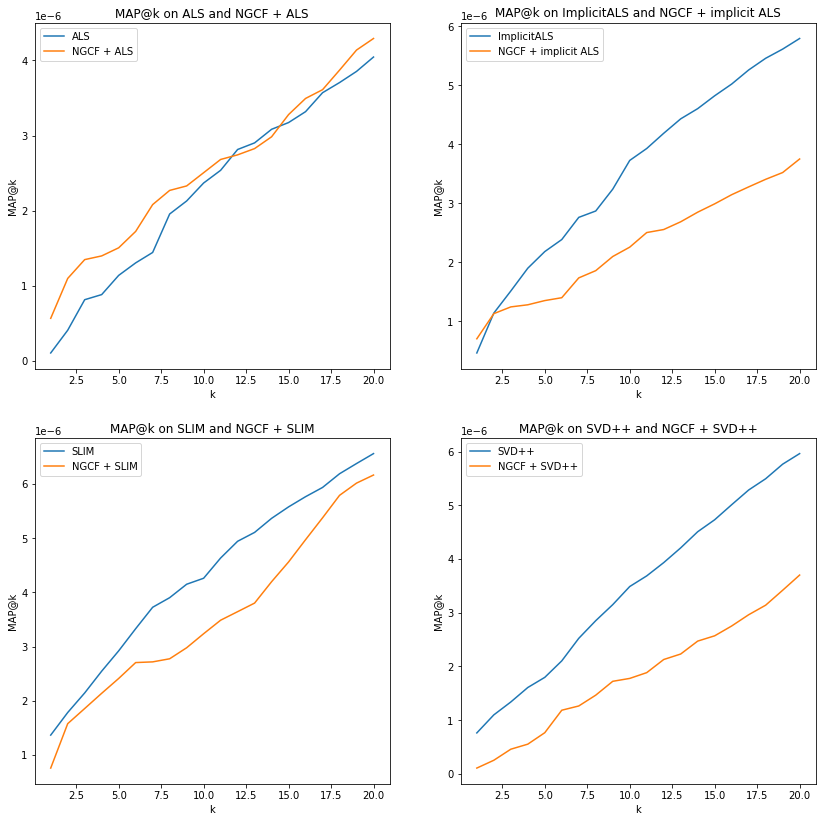

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for ind_method, method in enumerate(methods):
    ngcf_method = method2ngcf_method[method]
    
    precision_method = [0 for _ in range(20)]
    precision_ngcf_method = [0 for _ in range(20)]
    for metric_name in df_1.index: 
        if 'MAP' in metric_name:
            k_metric = int(metric_name.split('@')[1])
            precision_method[k_metric - 1] = df_1.loc[metric_name][method]
            precision_ngcf_method[k_metric - 1] = df_1.loc[metric_name][ngcf_method]
    x = np.arange(len(precision_method)) + 1
    axs[ind_method // 2, ind_method % 2].set_title(f"MAP@k on {method} and {ngcf_method}")
    axs[ind_method // 2, ind_method % 2].set_xlabel("k")
    axs[ind_method // 2, ind_method % 2].set_ylabel("MAP@k")
    axs[ind_method // 2, ind_method % 2].plot(x, precision_method, label=method)
    axs[ind_method // 2, ind_method % 2].plot(x, precision_ngcf_method, label=ngcf_method)
    axs[ind_method // 2, ind_method % 2].legend()

### Inference 2

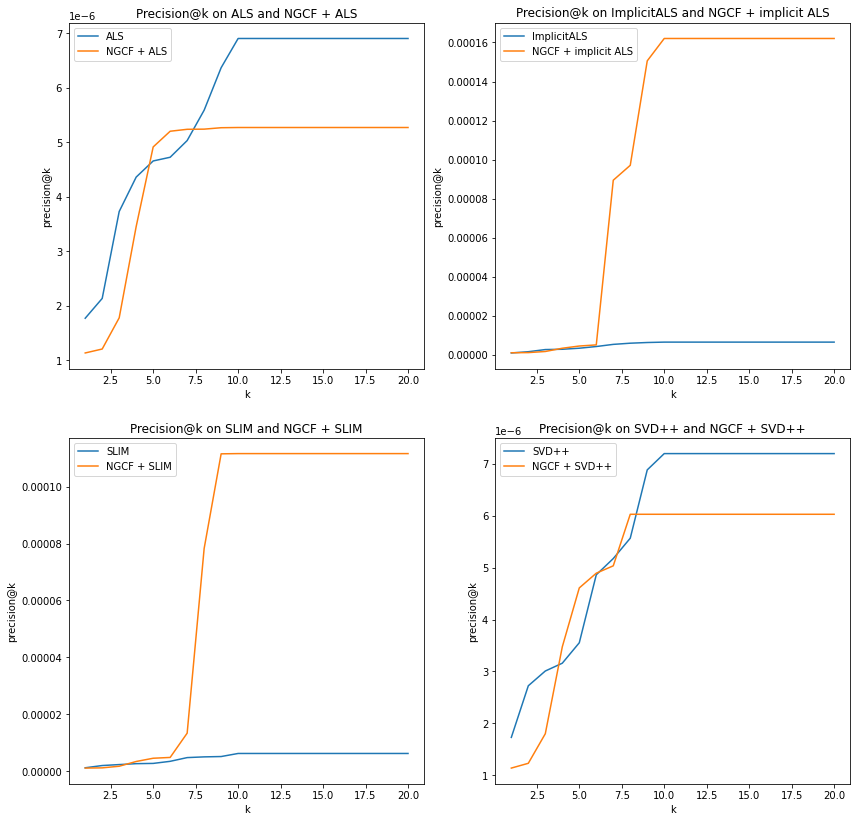

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for ind_method, method in enumerate(methods):
    ngcf_method = method2ngcf_method[method]
    
    precision_method = [0 for _ in range(20)]
    precision_ngcf_method = [0 for _ in range(20)]
    for metric_name in df_2.index: 
        if 'Precision' in metric_name:
            k_metric = int(metric_name.split('@')[1])
            precision_method[k_metric - 1] = df_2.loc[metric_name][method]
            precision_ngcf_method[k_metric - 1] = df_2.loc[metric_name][ngcf_method]
    x = np.arange(len(precision_method)) + 1
    axs[ind_method // 2, ind_method % 2].set_title(f"Precision@k on {method} and {ngcf_method}")
    axs[ind_method // 2, ind_method % 2].set_xlabel("k")
    axs[ind_method // 2, ind_method % 2].set_ylabel("precision@k")
    axs[ind_method // 2, ind_method % 2].plot(x, precision_method, label=method)
    axs[ind_method // 2, ind_method % 2].plot(x, precision_ngcf_method, label=ngcf_method)
    axs[ind_method // 2, ind_method % 2].legend()

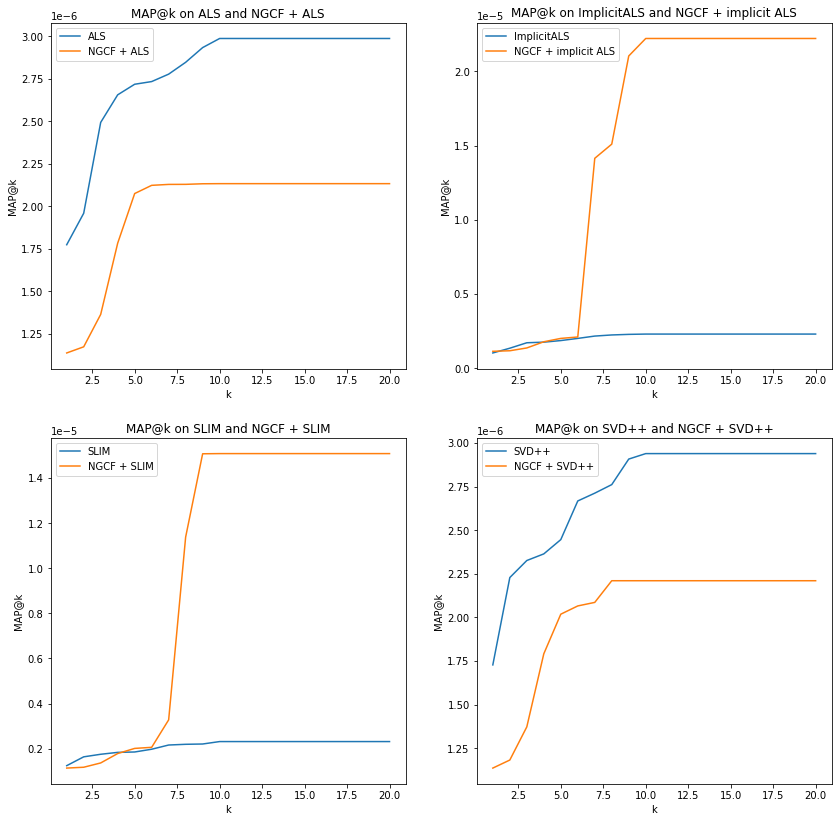

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for ind_method, method in enumerate(methods):
    ngcf_method = method2ngcf_method[method]
    
    precision_method = [0 for _ in range(20)]
    precision_ngcf_method = [0 for _ in range(20)]
    for metric_name in df_2.index: 
        if 'MAP' in metric_name:
            k_metric = int(metric_name.split('@')[1])
            precision_method[k_metric - 1] = df_2.loc[metric_name][method]
            precision_ngcf_method[k_metric - 1] = df_2.loc[metric_name][ngcf_method]
    x = np.arange(len(precision_method)) + 1
    axs[ind_method // 2, ind_method % 2].set_title(f"MAP@k on {method} and {ngcf_method}")
    axs[ind_method // 2, ind_method % 2].set_xlabel("k")
    axs[ind_method // 2, ind_method % 2].set_ylabel("MAP@k")
    axs[ind_method // 2, ind_method % 2].plot(x, precision_method, label=method)
    axs[ind_method // 2, ind_method % 2].plot(x, precision_ngcf_method, label=ngcf_method)
    axs[ind_method // 2, ind_method % 2].legend()

### max(inference_1, inference_2)

In [27]:
dict_max = {}
for key1 in metrics_dict_1.keys():
    dict_max[key1] = {}
    for key2 in metrics_dict_1[key1].keys():
        dict_max[key1][key2] = max(metrics_dict_1[key1][key2], metrics_dict_2[key1][key2])

df_max = pd.DataFrame(dict_max)

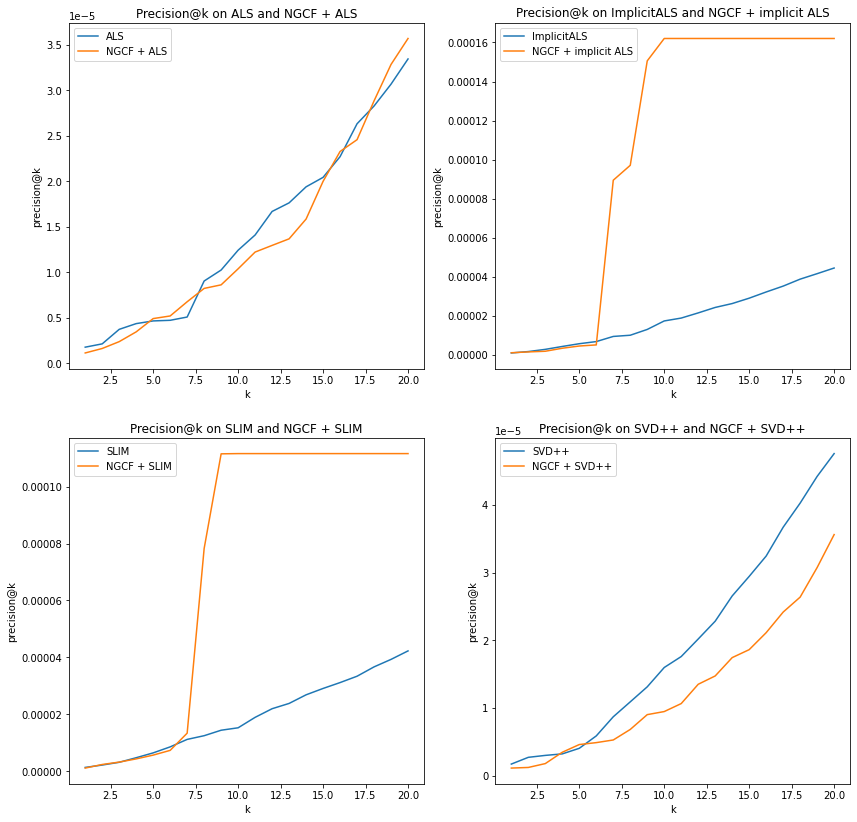

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for ind_method, method in enumerate(methods):
    ngcf_method = method2ngcf_method[method]
    
    precision_method = [0 for _ in range(20)]
    precision_ngcf_method = [0 for _ in range(20)]
    for metric_name in df_max.index: 
        if 'Precision' in metric_name:
            k_metric = int(metric_name.split('@')[1])
            precision_method[k_metric - 1] = df_max.loc[metric_name][method]
            precision_ngcf_method[k_metric - 1] = df_max.loc[metric_name][ngcf_method]
    x = np.arange(len(precision_method)) + 1
    axs[ind_method // 2, ind_method % 2].set_title(f"Precision@k on {method} and {ngcf_method}")
    axs[ind_method // 2, ind_method % 2].set_xlabel("k")
    axs[ind_method // 2, ind_method % 2].set_ylabel("precision@k")
    axs[ind_method // 2, ind_method % 2].plot(x, precision_method, label=method)
    axs[ind_method // 2, ind_method % 2].plot(x, precision_ngcf_method, label=ngcf_method)
    axs[ind_method // 2, ind_method % 2].legend()

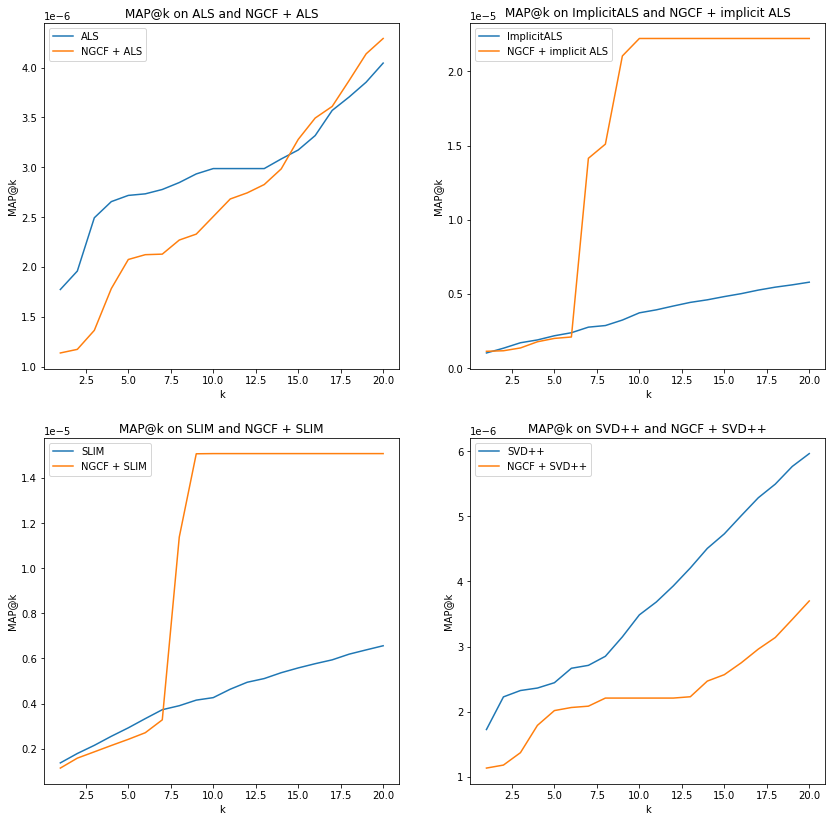

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for ind_method, method in enumerate(methods):
    ngcf_method = method2ngcf_method[method]
    
    precision_method = [0 for _ in range(20)]
    precision_ngcf_method = [0 for _ in range(20)]
    for metric_name in df_max.index: 
        if 'MAP' in metric_name:
            k_metric = int(metric_name.split('@')[1])
            precision_method[k_metric - 1] = df_max.loc[metric_name][method]
            precision_ngcf_method[k_metric - 1] = df_max.loc[metric_name][ngcf_method]
    x = np.arange(len(precision_method)) + 1
    axs[ind_method // 2, ind_method % 2].set_title(f"MAP@k on {method} and {ngcf_method}")
    axs[ind_method // 2, ind_method % 2].set_xlabel("k")
    axs[ind_method // 2, ind_method % 2].set_ylabel("MAP@k")
    axs[ind_method // 2, ind_method % 2].plot(x, precision_method, label=method)
    axs[ind_method // 2, ind_method % 2].plot(x, precision_ngcf_method, label=ngcf_method)
    axs[ind_method // 2, ind_method % 2].legend()

## 3. Сравнение подходов

In [30]:
metrics = ['MAP@1', 'MAP@10', 'MAP@20', 'MRR', 'NDCG', 'Precision@1', 'Precision@10', 'Precision@20']

### max(inference_1, inference_2)

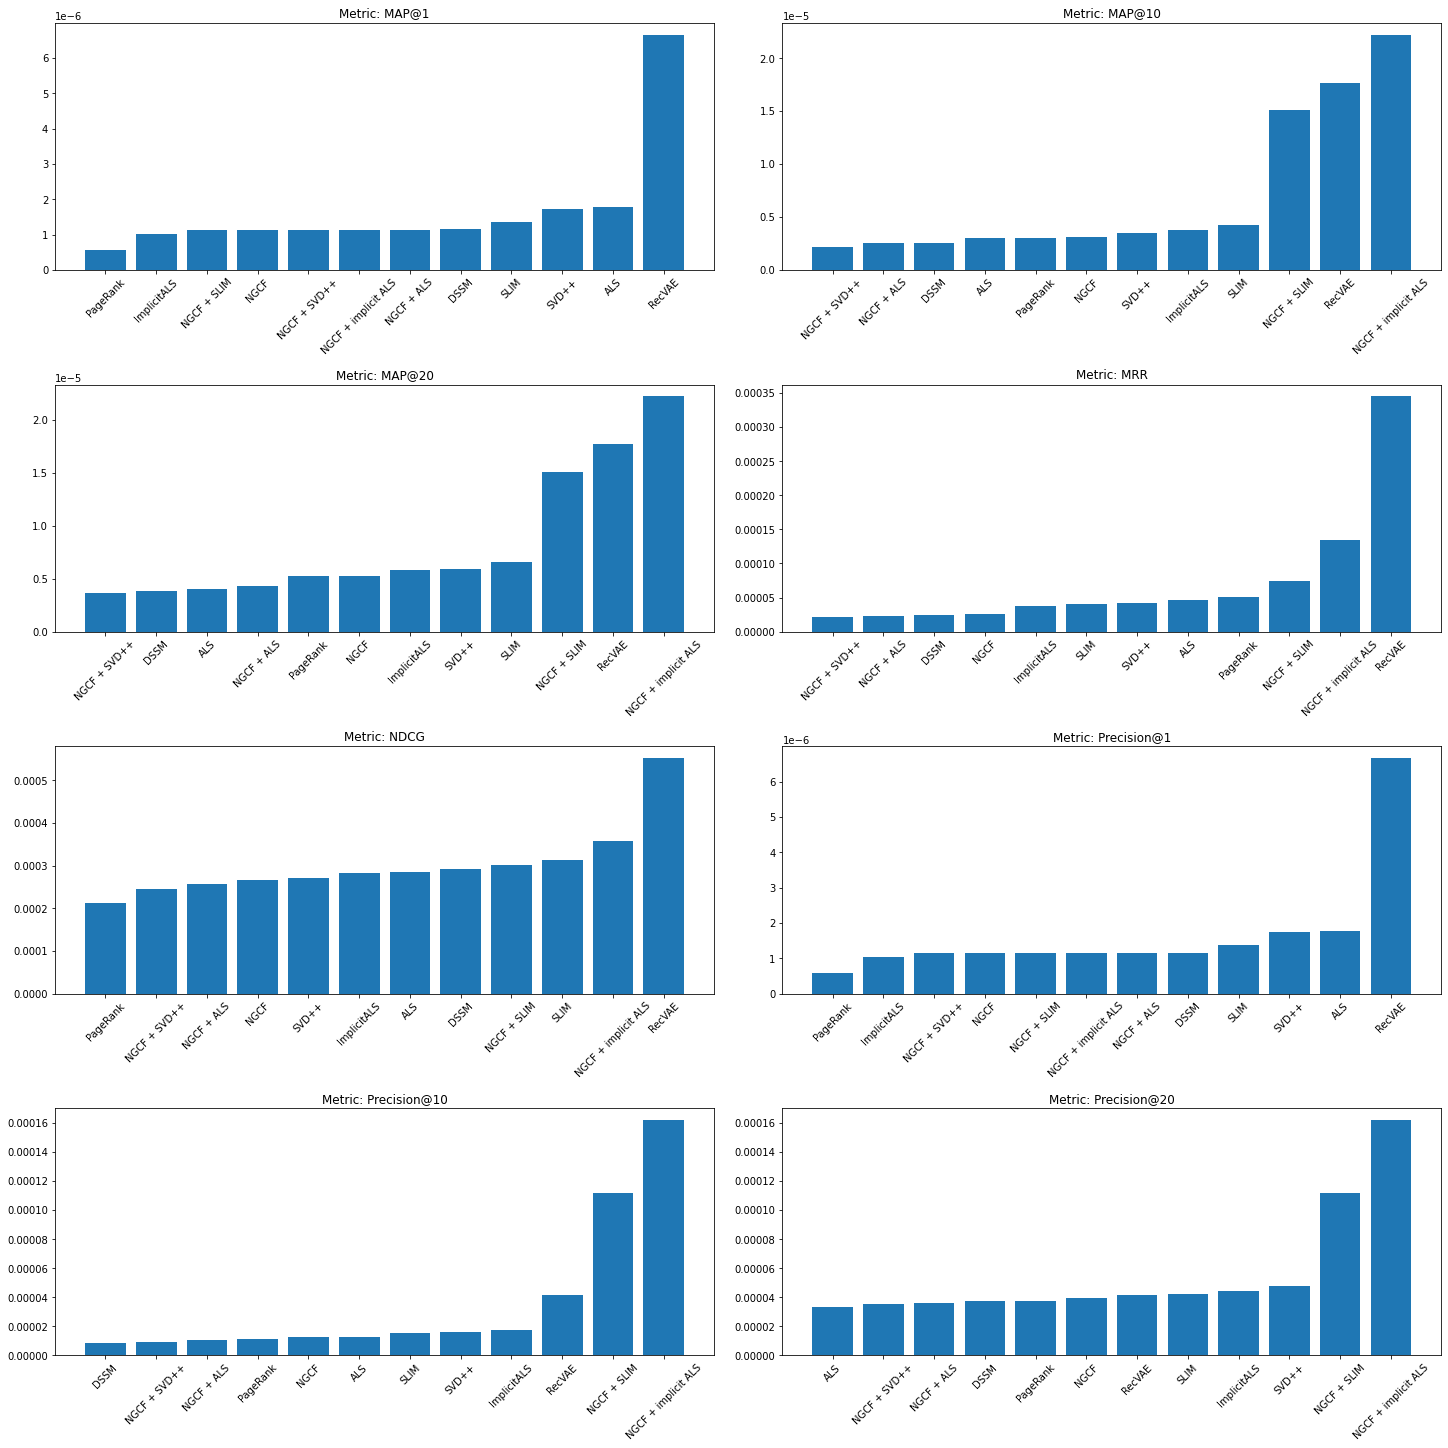

In [31]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20), constrained_layout = True)

for i, metric in enumerate(metrics):
    df_max = df_max.sort_values(by=metric, axis=1)
    x = df_max.loc[metric].index
    y = df_max.loc[metric].values
    axs[i // 2, i % 2].set_title(f"Metric: {metric}")
    axs[i // 2, i % 2].bar(x, y)
    for tick in axs[i // 2, i % 2].get_xticklabels():
        tick.set_rotation(45)

    axs[i // 2, i % 2].plot()
   


### inference_1

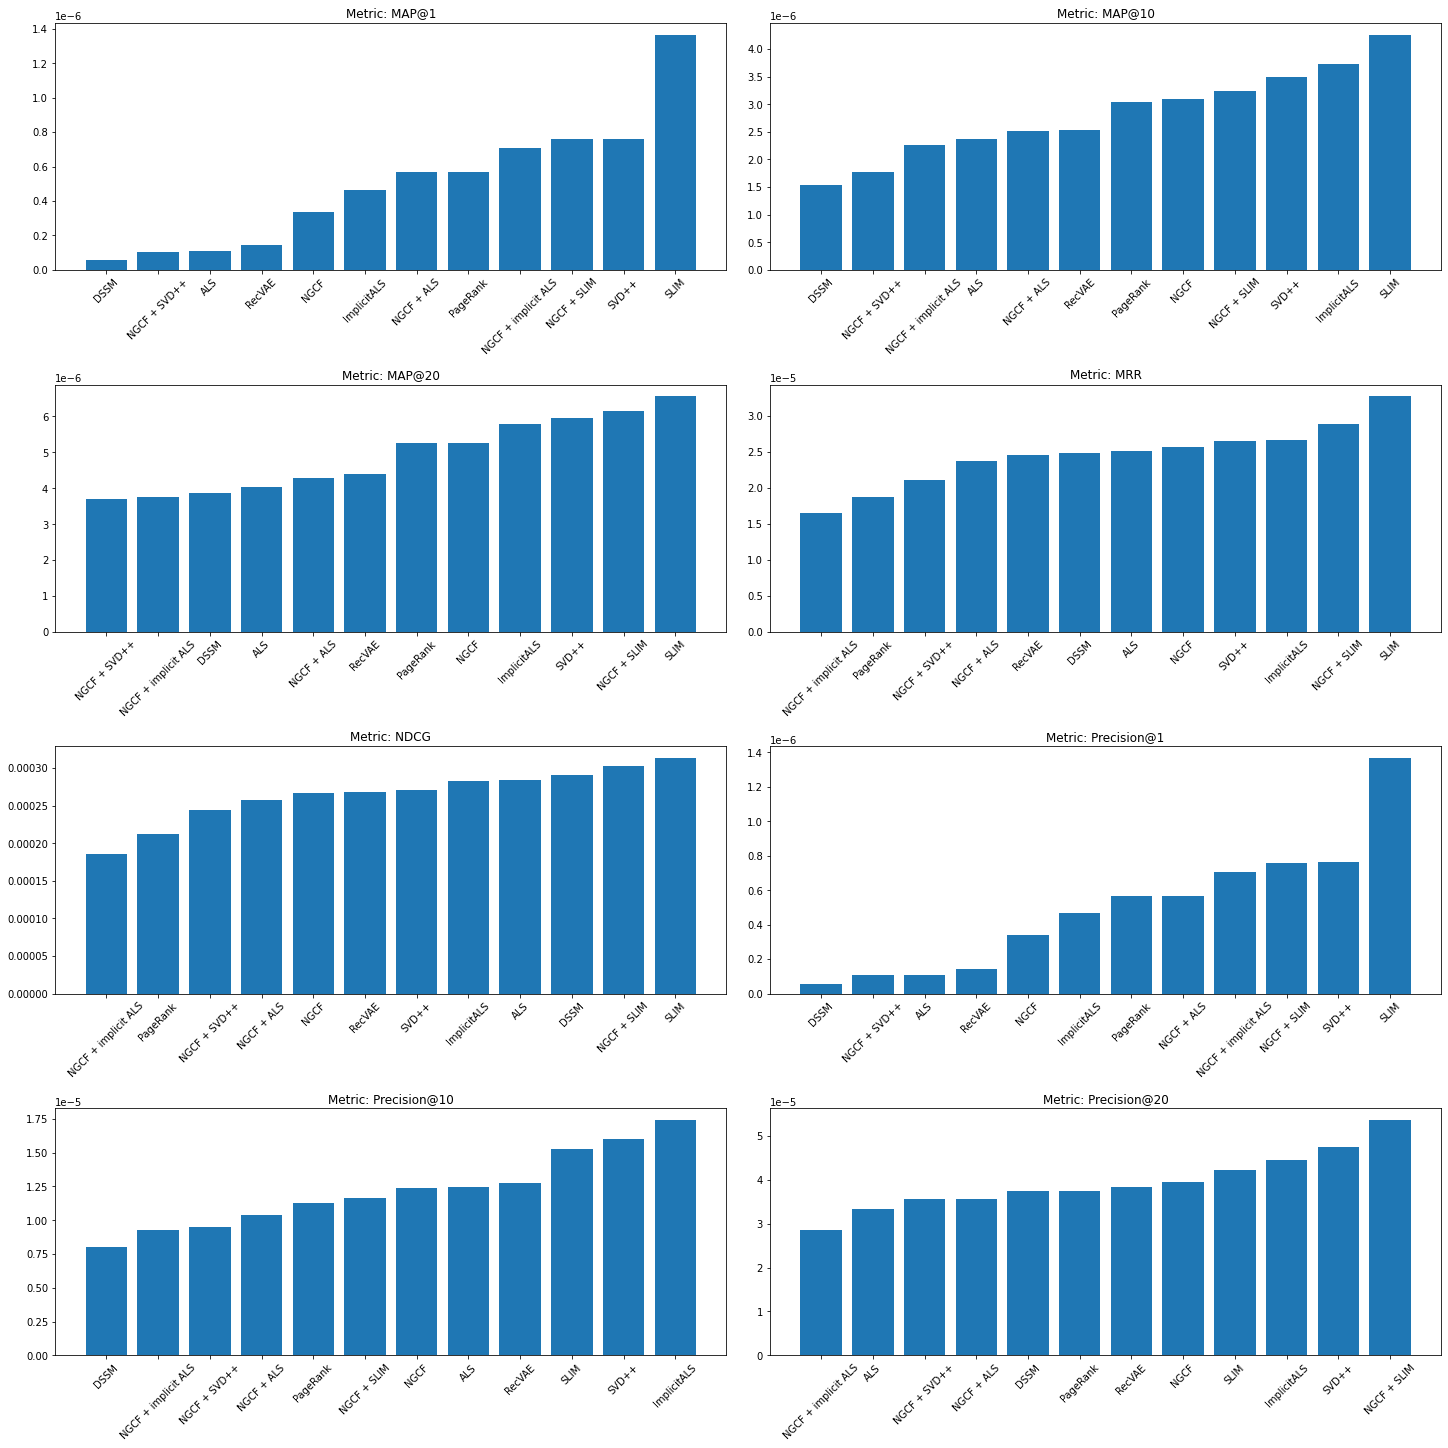

In [32]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20), constrained_layout = True)

for i, metric in enumerate(metrics):
    df_1 = df_1.sort_values(by=metric, axis=1)
    x = df_1.loc[metric].index
    y = df_1.loc[metric].values
    axs[i // 2, i % 2].set_title(f"Metric: {metric}")
    axs[i // 2, i % 2].bar(x, y)
    for tick in axs[i // 2, i % 2].get_xticklabels():
        tick.set_rotation(45)

    axs[i // 2, i % 2].plot()
   


### inference 2

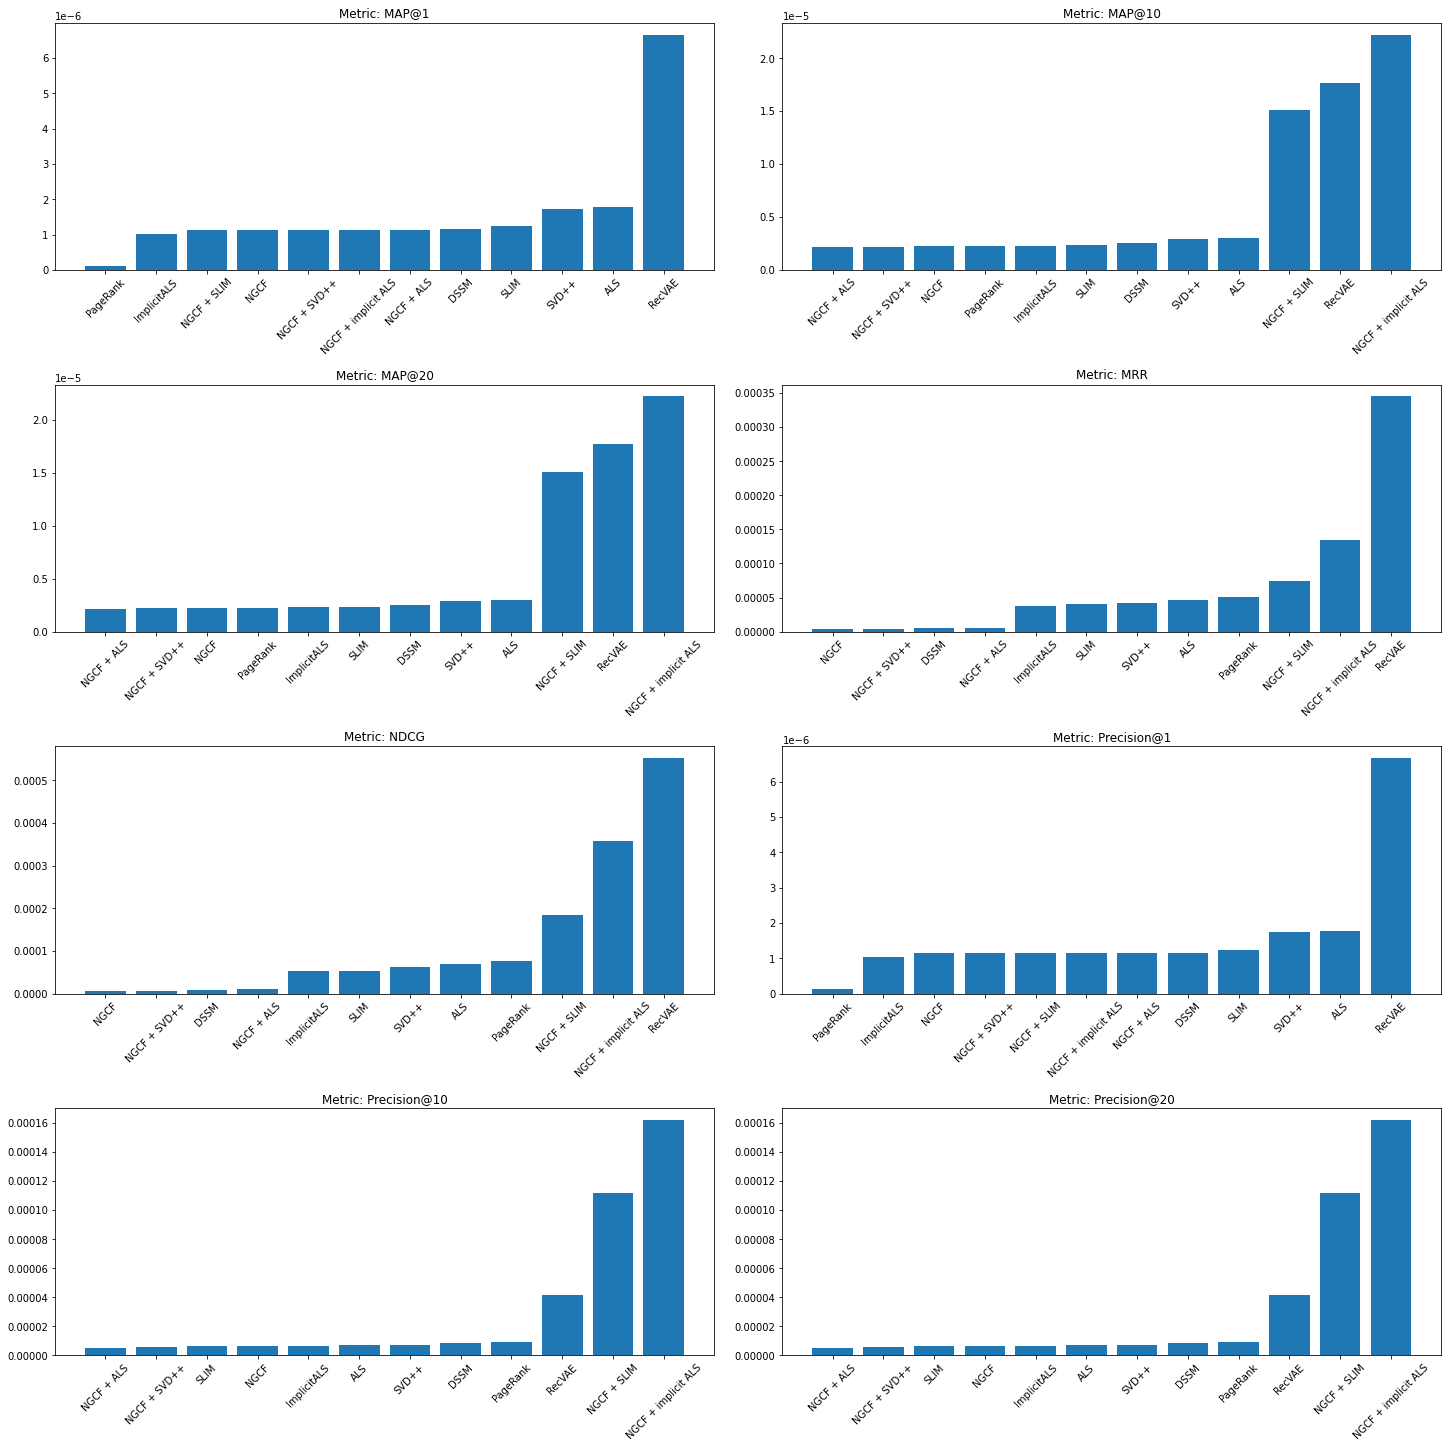

In [33]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20), constrained_layout = True)

for i, metric in enumerate(metrics):
    df_2 = df_2.sort_values(by=metric, axis=1)
    x = df_2.loc[metric].index
    y = df_2.loc[metric].values
    axs[i // 2, i % 2].set_title(f"Metric: {metric}")
    axs[i // 2, i % 2].bar(x, y)
    for tick in axs[i // 2, i % 2].get_xticklabels():
        tick.set_rotation(45)

    axs[i // 2, i % 2].plot()
   


## Comparing inference 1 and inference 2

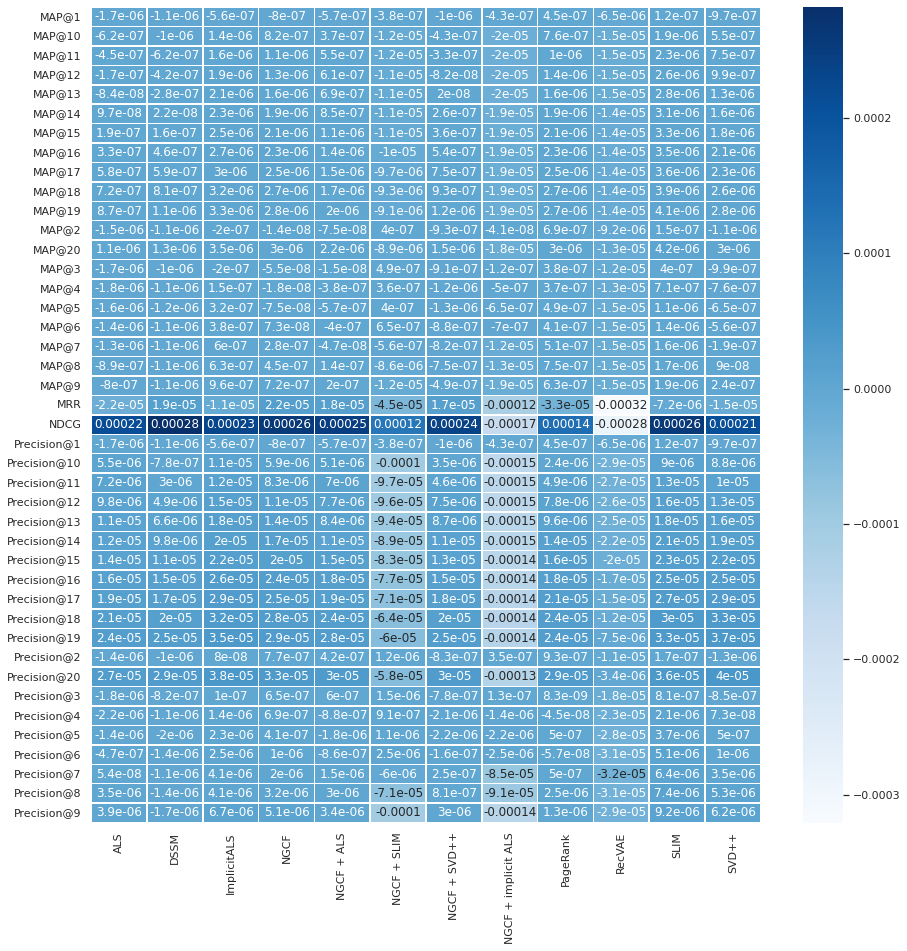

In [41]:
import seaborn as sns

df_diff = df_1 - df_2
sns.set(rc={'figure.figsize':(15,15)})

sns.heatmap(df_diff, annot=True, linewidths=0.5, cmap='Blues')


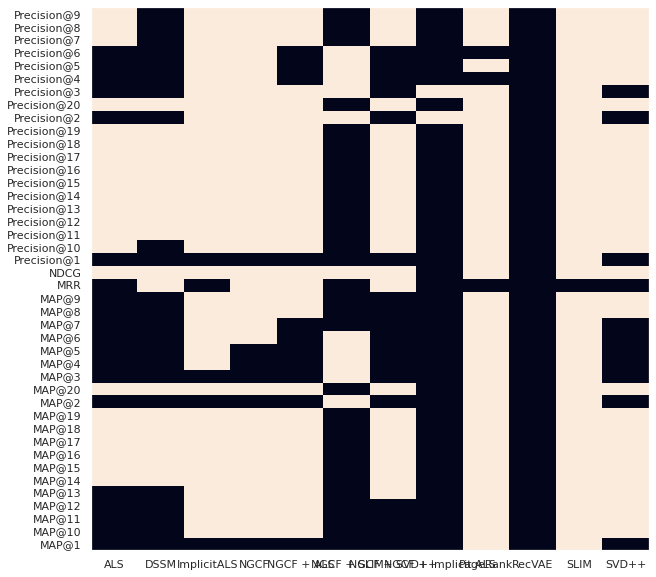

In [44]:
import seaborn as sns

df_diff = (df_1 - df_2) > 0

plt.figure(figsize=(10, 10))
plt.pcolor(df_diff)
plt.yticks(np.arange(0.5, len(df_diff.index), 1), df_diff.index)
plt.xticks(np.arange(0.5, len(df_diff.columns), 1), df_diff.columns)
plt.show()
